In [1]:
from matplotlib import pyplot, cm
from math import * 
import numpy
#import sympy
#from scipy.optimize import brentq
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# 1D Stefan Problem

In [2]:
t = 0.1
alpha1 = 2.06*10**-5
Cp = 2030
Tw = 383.15
Tsat = 373.15
L = 2.26*10**6

In [4]:
chi = 0.0669161

In [8]:
#Numerical Solution
l = 0.001
nx = 100
dx = l/nx
alpha2 = 0.17*10**-6
dt = (dx**2*0.05)/(max(alpha1,alpha2))
nt = int(t/dt)


In [6]:
#Solving transcedental equation to find out the interface distance

phi = numpy.zeros((nx,1),dtype=float)
T = numpy.zeros((nx,1),dtype=float) 
T[:] = Tsat 

tol = 0.1

for tstep in range(1,200000):
    XI = 2*chi*(sqrt(alpha1*tstep*dt))
    
    for i in range(0,nx):
        phi[i] = XI - (i*dx)
    
    Told = T.copy()

    for i in range(1,nx-1):
        
        if(phi[i]*phi[i+1] <= 0.):
        
            if((abs(phi[i])/(abs(phi[i])+abs(phi[i+1])))>tol):
            
                th = (abs(phi[i])/(abs(phi[i])+abs(phi[i+1])))
                Txp = (Tsat-Told[i])/th + Told[i]
                axm = alpha1
                axp = (alpha1+(alpha1*th+alpha2*(1.-th)))*0.5
                Txm = Told[i-1]
            
            else:
            
                th = (abs(phi[i-1])/(abs(phi[i-1])+abs(phi[i+1])))
                Txp = (Tsat-Told[i-1])/th + Told[i]
                axm = alpha1
                axp = (alpha1+(alpha1*th+alpha2*(1.-th)))*0.5
                Txm = Told[i-1]
            
    
        elif(phi[i]*phi[i-1] <= 0.):
        
            if((abs(phi[i])/(abs(phi[i])+abs(phi[i-1])))>tol):
            
                th = (abs(phi[i])/(abs(phi[i])+abs(phi[i-1])))
                Txm = (Told[i]-Tsat)/th + Told[i]
                axp = alpha2
                axm = (alpha2+(alpha2*th+alpha1*(1.-th)))*0.5
                Txp = Told[i+1]
            
            else:
            
                th = (abs(phi[i+1])/(abs(phi[i+1])+abs(phi[i-1])))
                Txm = (Told[i+1]-Tsat)/th + Told[i]
                axp = alpha2
                axm = (alpha2+(alpha2*th+alpha1*(1.-th)))*0.5
                Txp = Told[i+1]
    
        else:
            
            Txm = Told[i-1]
            Txp = Told[i+1]
            
            if(phi[i]>=0.):
                axm = alpha1
                axp = alpha1
            
            else:
                axm = alpha2
                axp = alpha2
                
        
        T[i] = Told[i] + dt*(axp*(Txp-Told[i])/dx - axm*(Told[i]-Txm)/dx)/dx          
            
            
    #Boundary Conditions
    T[0] = Tw
    T[-1] = Tsat
    
    T_res = sum((T-Told)**2)/nx
    
    
    
    if(tstep == 10):
        T_1 = T.copy()
    if(tstep == 100):
        T_2 = T.copy()
        
    if(tstep == 10000):
        T_3 = T.copy()
           
            

(0.0, 0.00025)

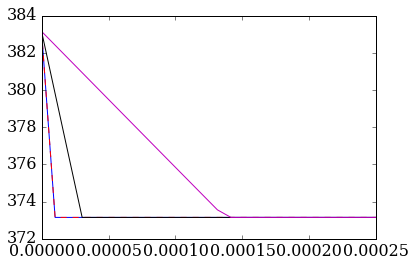

In [7]:
pyplot.plot(numpy.linspace(0,l,nx),T_1,'b')
pyplot.plot(numpy.linspace(0,l,nx),T_2,'--r')
pyplot.plot(numpy.linspace(0,l,nx),T_3,'k')
pyplot.plot(numpy.linspace(0,l,nx),T,'m')
pyplot.xlim([0.,0.00025])